# Tweets on iPhone 14
The purpose of this Jupyter Notebook is to illustrate getting data from Twitter as well as showing the final data visualizations created from the dataset found. I signed up for a Developer's account for Twitter's API [through this](https://developer.twitter.com/en/portal/dashboard) with Essential access (lowest access).

## Extracting Tweets through Twitter API

I used the command above to install tweepy, a Python package that allows for better access to the Twitter API. You can see the code that I used to pull requests for tweets in my [github](https://github.com/Braunstsf/data-assignment-twitter) link. I was only able to pull 100 tweets for this first dataset with limited attributes due to having an Essentials Developer Account. In order to replicate this in greater detail, one could appeal for an Academic Access Developer Account to take part in concepts such as sentimental analysis. 

In [1]:
import pandas as pd
import numpy as np

twitter_df = pd.read_csv('tweepy_data_iPhone.csv')

In [2]:
twitter_df.head()


,id,lang,username,created_at,public_metrics
0,1572129025019248644,en,IndianExpress,2022-09-20 07:42:22+00:00,"{'retweet_count': 1, 'reply_count': 0, 'like_c..."
1,1572129024813707271,ja,Collectbook,2022-09-20 07:42:22+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c..."
2,1572129023748186115,ar,bdalrhmn_ghzl,2022-09-20 07:42:22+00:00,"{'retweet_count': 12890, 'reply_count': 0, 'li..."
3,1572129023287001090,ar,Hansraj48299197,2022-09-20 07:42:22+00:00,"{'retweet_count': 6227, 'reply_count': 0, 'lik..."
4,1572129021340831746,th,imyourwalnuttt,2022-09-20 07:42:22+00:00,"{'retweet_count': 15421, 'reply_count': 0, 'li..."


In [3]:
print(len(twitter_df))

100


In [4]:
twitter_df.index


RangeIndex(start=0, stop=100, step=1)

In [5]:
twitter_df.columns

Index(['id', 'lang', 'username', 'created_at', 'public_metrics'], dtype='object')

In [6]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              100 non-null    int64 
 1   lang            100 non-null    object
 2   username        100 non-null    object
 3   created_at      100 non-null    object
 4   public_metrics  100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


As you can see by the preceding code and data frame, I only have 100 data points and 5 attributes to work with. However, it seems like public_metrics has more attributes inside the dictionaries. 

In [7]:
twitter_df["public_metrics"]

0     {'retweet_count': 1, 'reply_count': 0, 'like_c...
1     {'retweet_count': 0, 'reply_count': 0, 'like_c...
2     {'retweet_count': 12890, 'reply_count': 0, 'li...
3     {'retweet_count': 6227, 'reply_count': 0, 'lik...
4     {'retweet_count': 15421, 'reply_count': 0, 'li...
                            ...                        
95    {'retweet_count': 71, 'reply_count': 0, 'like_...
96    {'retweet_count': 0, 'reply_count': 0, 'like_c...
97    {'retweet_count': 0, 'reply_count': 0, 'like_c...
98    {'retweet_count': 1094, 'reply_count': 0, 'lik...
99    {'retweet_count': 277, 'reply_count': 0, 'like...
Name: public_metrics, Length: 100, dtype: object

In [8]:
twitter_df["public_metrics"].str.split(",", expand=True)

,0,1,2,3
0,{'retweet_count': 1,'reply_count': 0,'like_count': 0,'quote_count': 0}
1,{'retweet_count': 0,'reply_count': 0,'like_count': 0,'quote_count': 0}
2,{'retweet_count': 12890,'reply_count': 0,'like_count': 0,'quote_count': 0}
3,{'retweet_count': 6227,'reply_count': 0,'like_count': 0,'quote_count': 0}
4,{'retweet_count': 15421,'reply_count': 0,'like_count': 0,'quote_count': 0}
...,...,...,...,...
95,{'retweet_count': 71,'reply_count': 0,'like_count': 0,'quote_count': 0}
96,{'retweet_count': 0,'reply_count': 0,'like_count': 0,'quote_count': 0}
97,{'retweet_count': 0,'reply_count': 0,'like_count': 0,'quote_count': 0}
98,{'retweet_count': 1094,'reply_count': 0,'like_count': 0,'quote_count': 0}


For the following code, I will be trying to seperate the attributes from the intial attribute, public_metrics, and make 4 other attributes: retweet_count, reply_count, like_count, quote_count.

In [9]:
public_metrics = twitter_df['public_metrics']
print(public_metrics)

0     {'retweet_count': 1, 'reply_count': 0, 'like_c...
1     {'retweet_count': 0, 'reply_count': 0, 'like_c...
2     {'retweet_count': 12890, 'reply_count': 0, 'li...
3     {'retweet_count': 6227, 'reply_count': 0, 'lik...
4     {'retweet_count': 15421, 'reply_count': 0, 'li...
                            ...                        
95    {'retweet_count': 71, 'reply_count': 0, 'like_...
96    {'retweet_count': 0, 'reply_count': 0, 'like_c...
97    {'retweet_count': 0, 'reply_count': 0, 'like_c...
98    {'retweet_count': 1094, 'reply_count': 0, 'lik...
99    {'retweet_count': 277, 'reply_count': 0, 'like...
Name: public_metrics, Length: 100, dtype: object


In [10]:
twitter_df['public_metrics'] = twitter_df['public_metrics'].str.replace("{","")
twitter_df['public_metrics'] = twitter_df['public_metrics'].str.replace("}","") 
print(twitter_df['public_metrics'])
print(twitter_df.head())


0     'retweet_count': 1, 'reply_count': 0, 'like_co...
1     'retweet_count': 0, 'reply_count': 0, 'like_co...
2     'retweet_count': 12890, 'reply_count': 0, 'lik...
3     'retweet_count': 6227, 'reply_count': 0, 'like...
4     'retweet_count': 15421, 'reply_count': 0, 'lik...
                            ...                        
95    'retweet_count': 71, 'reply_count': 0, 'like_c...
96    'retweet_count': 0, 'reply_count': 0, 'like_co...
97    'retweet_count': 0, 'reply_count': 0, 'like_co...
98    'retweet_count': 1094, 'reply_count': 0, 'like...
99    'retweet_count': 277, 'reply_count': 0, 'like_...
Name: public_metrics, Length: 100, dtype: object
                    id lang         username                 created_at  \
0  1572129025019248644   en    IndianExpress  2022-09-20 07:42:22+00:00   
1  1572129024813707271   ja      Collectbook  2022-09-20 07:42:22+00:00   
2  1572129023748186115   ar    bdalrhmn_ghzl  2022-09-20 07:42:22+00:00   
3  1572129023287001090   ar  Hansra

/var/folders/38/82qmd0hx4qlc9m1_bhwk48n40000gp/T/ipykernel_60513/1743870856.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  twitter_df['public_metrics'] = twitter_df['public_metrics'].str.replace("{","")
/var/folders/38/82qmd0hx4qlc9m1_bhwk48n40000gp/T/ipykernel_60513/1743870856.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  twitter_df['public_metrics'] = twitter_df['public_metrics'].str.replace("}","")


In [11]:
twitter_df[['retweet_count','reply_count', 'like_count', 'quote_count']] = twitter_df.public_metrics.str.split(",", expand=True)
print(twitter_df.head())

                    id lang         username                 created_at  \
0  1572129025019248644   en    IndianExpress  2022-09-20 07:42:22+00:00   
1  1572129024813707271   ja      Collectbook  2022-09-20 07:42:22+00:00   
2  1572129023748186115   ar    bdalrhmn_ghzl  2022-09-20 07:42:22+00:00   
3  1572129023287001090   ar  Hansraj48299197  2022-09-20 07:42:22+00:00   
4  1572129021340831746   th   imyourwalnuttt  2022-09-20 07:42:22+00:00   

                                      public_metrics           retweet_count  \
0  'retweet_count': 1, 'reply_count': 0, 'like_co...      'retweet_count': 1   
1  'retweet_count': 0, 'reply_count': 0, 'like_co...      'retweet_count': 0   
2  'retweet_count': 12890, 'reply_count': 0, 'lik...  'retweet_count': 12890   
3  'retweet_count': 6227, 'reply_count': 0, 'like...   'retweet_count': 6227   
4  'retweet_count': 15421, 'reply_count': 0, 'lik...  'retweet_count': 15421   

         reply_count        like_count        quote_count  
0   'rep

In [12]:
twitter_df[['delete_retweet_count', 'retweet_count']] = twitter_df["retweet_count"].str.split(":", expand=True)
print(twitter_df.head())
twitter_df.info()

                    id lang         username                 created_at  \
0  1572129025019248644   en    IndianExpress  2022-09-20 07:42:22+00:00   
1  1572129024813707271   ja      Collectbook  2022-09-20 07:42:22+00:00   
2  1572129023748186115   ar    bdalrhmn_ghzl  2022-09-20 07:42:22+00:00   
3  1572129023287001090   ar  Hansraj48299197  2022-09-20 07:42:22+00:00   
4  1572129021340831746   th   imyourwalnuttt  2022-09-20 07:42:22+00:00   

                                      public_metrics retweet_count  \
0  'retweet_count': 1, 'reply_count': 0, 'like_co...             1   
1  'retweet_count': 0, 'reply_count': 0, 'like_co...             0   
2  'retweet_count': 12890, 'reply_count': 0, 'lik...         12890   
3  'retweet_count': 6227, 'reply_count': 0, 'like...          6227   
4  'retweet_count': 15421, 'reply_count': 0, 'lik...         15421   

         reply_count        like_count        quote_count delete_retweet_count  
0   'reply_count': 0   'like_count': 0   'quote

In [13]:
twitter_df['retweet_count'] = twitter_df['retweet_count'].astype(int)

In [14]:
twitter_df.info()
twitter_df['delete_retweet_count'].info()
twitter_df.drop(columns='delete_retweet_count', inplace=True)
print(twitter_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    100 non-null    int64 
 1   lang                  100 non-null    object
 2   username              100 non-null    object
 3   created_at            100 non-null    object
 4   public_metrics        100 non-null    object
 5   retweet_count         100 non-null    int64 
 6   reply_count           100 non-null    object
 7   like_count            100 non-null    object
 8   quote_count           100 non-null    object
 9   delete_retweet_count  100 non-null    object
dtypes: int64(2), object(8)
memory usage: 7.9+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: delete_retweet_count
Non-Null Count  Dtype 
--------------  ----- 
100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes
                    id lang  

In [15]:
print(twitter_df['retweet_count'])

0         1
1         0
2     12890
3      6227
4     15421
      ...  
95       71
96        0
97        0
98     1094
99      277
Name: retweet_count, Length: 100, dtype: int64


The code below shows the steps that I took towards seperating the values from the attribute by splitting the 'retweet_count' into 'delete_retweet_count' and 'retweet_count' with the first split column including information I didn't need and the second column with the values. 

I then turned the values from the modified 'retweet_count' to integer values since they were still strings at that point. 

The last change that I did to the Data Frame was dropping the column. I will be repeating the steps above for the other three columns

In [16]:
twitter_df[['delete_reply_count', 'reply_count']] = twitter_df['reply_count'].str.split(":", expand=True)
twitter_df[['delete_like_count', 'like_count']] = twitter_df['like_count'].str.split(":", expand=True)
twitter_df[['delete_quote_count', 'quote_count']] = twitter_df['quote_count'].str.split(":", expand=True)
print(twitter_df.head())

                    id lang         username                 created_at  \
0  1572129025019248644   en    IndianExpress  2022-09-20 07:42:22+00:00   
1  1572129024813707271   ja      Collectbook  2022-09-20 07:42:22+00:00   
2  1572129023748186115   ar    bdalrhmn_ghzl  2022-09-20 07:42:22+00:00   
3  1572129023287001090   ar  Hansraj48299197  2022-09-20 07:42:22+00:00   
4  1572129021340831746   th   imyourwalnuttt  2022-09-20 07:42:22+00:00   

                                      public_metrics  retweet_count  \
0  'retweet_count': 1, 'reply_count': 0, 'like_co...              1   
1  'retweet_count': 0, 'reply_count': 0, 'like_co...              0   
2  'retweet_count': 12890, 'reply_count': 0, 'lik...          12890   
3  'retweet_count': 6227, 'reply_count': 0, 'like...           6227   
4  'retweet_count': 15421, 'reply_count': 0, 'lik...          15421   

  reply_count like_count quote_count delete_reply_count delete_like_count  \
0           0          0           0      're

In [17]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  100 non-null    int64 
 1   lang                100 non-null    object
 2   username            100 non-null    object
 3   created_at          100 non-null    object
 4   public_metrics      100 non-null    object
 5   retweet_count       100 non-null    int64 
 6   reply_count         100 non-null    object
 7   like_count          100 non-null    object
 8   quote_count         100 non-null    object
 9   delete_reply_count  100 non-null    object
 10  delete_like_count   100 non-null    object
 11  delete_quote_count  100 non-null    object
dtypes: int64(2), object(10)
memory usage: 9.5+ KB


In [18]:
twitter_df[['reply_count', 'like_count', 'quote_count']] = twitter_df[['reply_count', 'like_count', 'quote_count']].apply(lambda x: x.astype('int'))

In [19]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  100 non-null    int64 
 1   lang                100 non-null    object
 2   username            100 non-null    object
 3   created_at          100 non-null    object
 4   public_metrics      100 non-null    object
 5   retweet_count       100 non-null    int64 
 6   reply_count         100 non-null    int64 
 7   like_count          100 non-null    int64 
 8   quote_count         100 non-null    int64 
 9   delete_reply_count  100 non-null    object
 10  delete_like_count   100 non-null    object
 11  delete_quote_count  100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [20]:
twitter_df = twitter_df.drop(twitter_df.loc[:, 'delete_reply_count':'delete_quote_count'].columns, axis=1)

We have the four seperate attributes created from public_metrics so we can now delete it from the rest of the columns.

In [21]:
twitter_df.drop(columns='public_metrics', inplace=True)
print(twitter_df.head())

                    id lang         username                 created_at  \
0  1572129025019248644   en    IndianExpress  2022-09-20 07:42:22+00:00   
1  1572129024813707271   ja      Collectbook  2022-09-20 07:42:22+00:00   
2  1572129023748186115   ar    bdalrhmn_ghzl  2022-09-20 07:42:22+00:00   
3  1572129023287001090   ar  Hansraj48299197  2022-09-20 07:42:22+00:00   
4  1572129021340831746   th   imyourwalnuttt  2022-09-20 07:42:22+00:00   

   retweet_count  reply_count  like_count  quote_count  
0              1            0           0            0  
1              0            0           0            0  
2          12890            0           0            0  
3           6227            0           0            0  
4          15421            0           0            0  


In [22]:
twitter_df.rename(columns={'id':'ID', 'lang':'Language', 'username':'Username', 'created_at':'Created at',
                           'retweet_count':'Retweets', 'reply_count':'Replies', 'like_count':'Likes', 'quote_count': 'Quotes'}, inplace = True)

I wanted to make the attributes a little bit more cleaned up so I opted to capitalize them. 

In [23]:
print(twitter_df.head())

                    ID Language         Username                 Created at  \
0  1572129025019248644       en    IndianExpress  2022-09-20 07:42:22+00:00   
1  1572129024813707271       ja      Collectbook  2022-09-20 07:42:22+00:00   
2  1572129023748186115       ar    bdalrhmn_ghzl  2022-09-20 07:42:22+00:00   
3  1572129023287001090       ar  Hansraj48299197  2022-09-20 07:42:22+00:00   
4  1572129021340831746       th   imyourwalnuttt  2022-09-20 07:42:22+00:00   

   Retweets  Replies  Likes  Quotes  
0         1        0      0       0  
1         0        0      0       0  
2     12890        0      0       0  
3      6227        0      0       0  
4     15421        0      0       0  


In [24]:
twitter_df.describe()

,ID,Retweets,Replies,Likes,Quotes
count,1.000000e+02,100.000000,100.00,100.0,100.0
mean,1.572129e+18,3375.450000,0.01,0.0,0.0
std,2.788202e+10,7044.052833,0.10,0.0,0.0
min,1.572129e+18,0.000000,0.00,0.0,0.0
25%,1.572129e+18,1.750000,0.00,0.0,0.0
50%,1.572129e+18,155.500000,0.00,0.0,0.0
75%,1.572129e+18,1479.500000,0.00,0.0,0.0
max,1.572129e+18,35346.000000,1.00,0.0,0.0


In [25]:
print(twitter_df)

                     ID Language         Username                 Created at  \
0   1572129025019248644       en    IndianExpress  2022-09-20 07:42:22+00:00   
1   1572129024813707271       ja      Collectbook  2022-09-20 07:42:22+00:00   
2   1572129023748186115       ar    bdalrhmn_ghzl  2022-09-20 07:42:22+00:00   
3   1572129023287001090       ar  Hansraj48299197  2022-09-20 07:42:22+00:00   
4   1572129021340831746       th   imyourwalnuttt  2022-09-20 07:42:22+00:00   
..                  ...      ...              ...                        ...   
95  1572128933348360195       en      Splendoura1  2022-09-20 07:42:01+00:00   
96  1572128932690006019       in    hazimhalimmmm  2022-09-20 07:42:00+00:00   
97  1572128932396412930       en     simplyyhamza  2022-09-20 07:42:00+00:00   
98  1572128930324414464       ja   angelmiyukorin  2022-09-20 07:42:00+00:00   
99  1572128929686913024       th        lay_metal  2022-09-20 07:42:00+00:00   

    Retweets  Replies  Likes  Quotes  


Unfortunately, it seems like the only two factors that are discernible/plottable would be languages and retweets. 

In [26]:
twitter_df['Language'] = twitter_df['Language'].astype(str)
df_relation = twitter_df[['Language', 'Retweets']]

In [27]:
print(df_relation)
df_relation.info()

   Language  Retweets
0        en         1
1        ja         0
2        ar     12890
3        ar      6227
4        th     15421
..      ...       ...
95       en        71
96       in         0
97       en         0
98       ja      1094
99       th       277

[100 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Language  100 non-null    object
 1   Retweets  100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


This subset of the dataframe focuses on the Language and the number of retweets from that specific tweet.

In [28]:
twitter_df['Retweets'].max() 
#twitter_df['Retweets'].idxmax()

35346

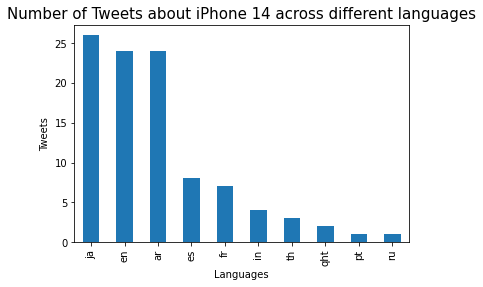

In [29]:
import matplotlib.pyplot as plt
twitter_df['Language'].value_counts().plot(kind='bar')
plt.ylabel('Tweets')
plt.xlabel('Languages')
plt.title('Number of Tweets about iPhone 14 across different languages', fontsize=15)
plt.savefig('tweets_iphone14_languages.jpg')


The histogram shown above display the number of tweets in certain languages. In the histogram, the horizontal label shows the categories of each language with the number of tweets on the vertical mode shown by the bars. In this case, you can see that in the sample of 100 tweets; Japanese, English, and Arabic make up the languages used in this sample. 

In [30]:
#trying to accumulate the number of retweets in each language 
lang = []
list_tweets_language = twitter_df['Language'].values.tolist()
for i in twitter_df['Language']:
    if i in lang: 
        continue
    else: 
        lang.append(i)

In [31]:
print(lang)

['en', 'ja', 'ar', 'th', 'pt', 'fr', 'es', 'ru', 'in', 'qht']


In [32]:
list_retweets = twitter_df['Retweets'].values.tolist()
#this code is used to sort numbers into each language
languages_with_tweets = twitter_df.groupby('Language')['Retweets'].sum() 
print(languages_with_tweets)

Language
ar     295208
en       5457
es       3611
fr       4501
in        989
ja      12049
pt          0
qht        32
ru          0
th      15698
Name: Retweets, dtype: int64


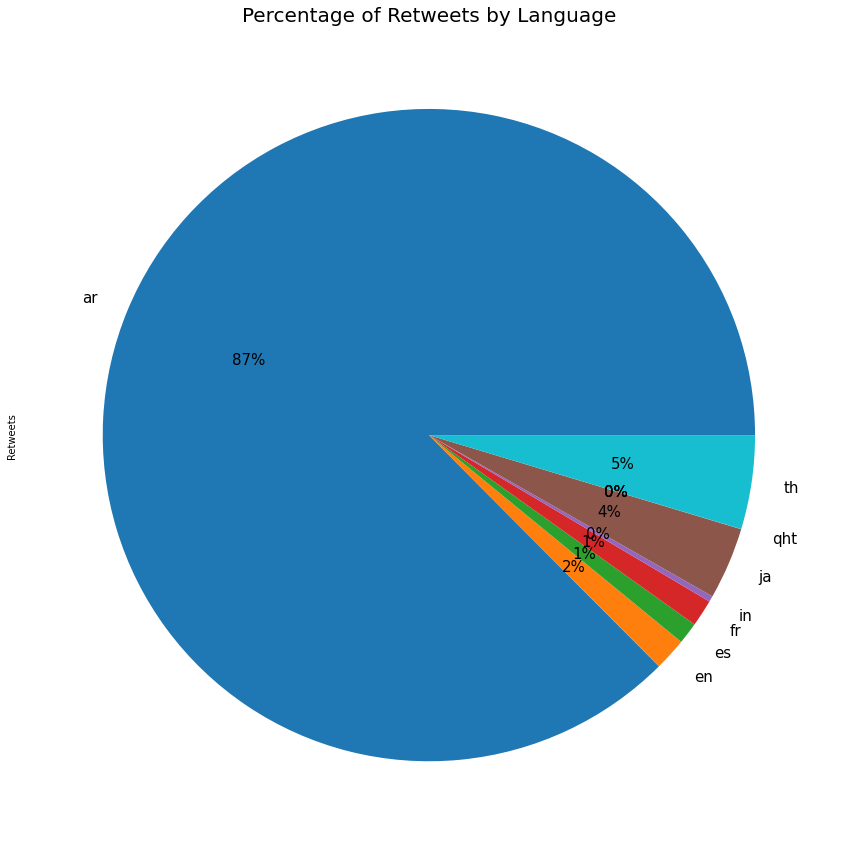

In [33]:
#trying to accumulate number of tweets in each language 
languages_with_tweets.plot(kind='pie', autopct='%1.0f%%', figsize=(20, 15), textprops={'fontsize': 15})
plt.title('Percentage of Retweets by Language', fontsize=20)
plt.savefig('percentage_retweets_language.jpg')

The following graph shows the percentage of retweets based on language. It seems based on the pie chart that tweets in arabic in the sample had more retweets in general with thai having the second most retweets.

In [34]:
type(languages_with_tweets)
languages_with_tweets = languages_with_tweets.to_frame()
print(languages_with_tweets)

          Retweets
Language          
ar          295208
en            5457
es            3611
fr            4501
in             989
ja           12049
pt               0
qht             32
ru               0
th           15698


In [35]:
print(languages_with_tweets['Retweets'])
values = languages_with_tweets.values.tolist()

Language
ar     295208
en       5457
es       3611
fr       4501
in        989
ja      12049
pt          0
qht        32
ru          0
th      15698
Name: Retweets, dtype: int64


In [36]:
import seaborn as sns
retweets = [295208, 5457, 3611, 4501, 989, 12049, 0, 32, 0, 15698]
lang = ['ar', 'en', 'es', 'fr', 'in', 'ja', 'pt', 'qht', 'ru', 'th']
print(lang)
#lang_retweets_dict = dict(zip(lang, retweets))


['ar', 'en', 'es', 'fr', 'in', 'ja', 'pt', 'qht', 'ru', 'th']


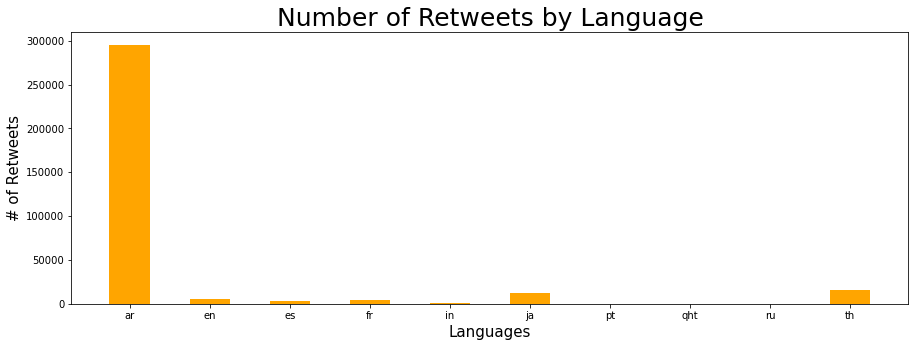

In [37]:
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(lang, retweets, color ='orange',
        width = 0.5)
plt.xlabel("Languages", fontsize=15)
plt.ylabel("# of Retweets", fontsize=15)
plt.title("Number of Retweets by Language", fontsize=25)
plt.savefig('retweets_by_language.jpg')

The following bar graph shows the information displayed previously on a pie chart in a histogram. As one can see, the number of retweets by other languages are miniscule when compared with those that are arabic. 

In [40]:
twitter_df.to_csv('updated_tweepy_data_iPhone.csv', encoding='utf-8')